# Part 1: Survival machine learning prediction on all clinical features (reproduce the results presented in Table-4)




In [1]:
# Import all needed libraries

import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer,precision_score,recall_score,f1_score,accuracy_score,roc_auc_score,matthews_corrcoef, average_precision_score
from sklearn.model_selection import cross_validate

In [2]:
# Load data to a dataframe
heart_failure_df=pd.read_csv("/content/heart_failure_clinical_records_dataset.csv")
heart_failure_df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [3]:
# Overview dataset (dimension, data type)
heart_failure_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [40]:
# Descriptive statistics
heart_failure_df.describe() 

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


1. Employ several methods (10 ML Classifiers) to predict the survival of the patients.

In [5]:
# Spliting data set into train and test set

target_labels =heart_failure_df.iloc[:,12:]     # dependent variabls
all_features=heart_failure_df.iloc[:,:12]     # independent variables
x_train,x_test,y_train,y_test=train_test_split(all_features,target_labels,train_size=0.80,random_state=0) # 80% training-testing rule

In [7]:
# Graadiant boosting 

# Set number of iterations
from sklearn.model_selection import KFold 
k = 70
#kf = KFold(n_splits=k, random_state=None)

# Training model
gb= GradientBoostingClassifier(learning_rate=0.1)
gb.fit(x_train, y_train)

# Predicting
y_pred=gb.predict(x_test)

# Evaluating model’s performance with 7 different metrics
scores={"MCC":make_scorer(matthews_corrcoef),"f1_score":make_scorer(f1_score),"Accuracy":make_scorer(accuracy_score),
        "precision":make_scorer(precision_score),"recall":make_scorer(recall_score),
        "average_precision":make_scorer(average_precision_score),"Roc":make_scorer(roc_auc_score)}

kfold=cross_validate(gb,x_train,y_train,scoring=scores,cv=k,n_jobs=-1)

# Get the average value after 70 executions of 7 metrics
l=list(kfold.values())
l3=[np.mean(l[2]),np.mean(l[3]),np.mean(l[4]),np.mean(l[5]),np.mean(l[6]),np.mean(l[7]),np.mean(l[8])]

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [8]:
# Random Forest
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)

# Evaluating performance with metrics
scores={"MCC":make_scorer(matthews_corrcoef),"f1_score":make_scorer(f1_score),"Accuracy":make_scorer(accuracy_score),
        "precision":make_scorer(precision_score),"recall":make_scorer(recall_score),
        "average_precision":make_scorer(average_precision_score),"Roc":make_scorer(roc_auc_score)}

kfold=cross_validate(rf,x_train,y_train,scoring=scores,cv=k)
l=list(kfold.values())
l1=[np.mean(l[2]),np.mean(l[3]),np.mean(l[4]),np.mean(l[5]),np.mean(l[6]),np.mean(l[7]),np.mean(l[8])]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:900: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this b

In [9]:
# Decision tree

# Training
tree = DecisionTreeClassifier()
tree=tree.fit(x_train,y_train)
# Predicting
y_pred=tree.predict(x_test)

# Evaluate performance with 7 metrics
scores={"MCC":make_scorer(matthews_corrcoef),"f1_score":make_scorer(f1_score),"Accuracy":make_scorer(accuracy_score),
        "precision":make_scorer(precision_score),"recall":make_scorer(recall_score),
        "average_precision":make_scorer(average_precision_score),"Roc":make_scorer(roc_auc_score)}

kfold=cross_validate(tree,x_train,y_train,scoring=scores,cv=k)

# Get average values
l=list(kfold.values())
l2=[np.mean(l[2]),np.mean(l[3]),np.mean(l[4]),np.mean(l[5]),np.mean(l[6]),np.mean(l[7]),np.mean(l[8])]

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:900: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:900: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn

In [10]:
# Linear regression
lr = LogisticRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)

# Evaluating performance with metrics
scores={"MCC":make_scorer(matthews_corrcoef),"f1_score":make_scorer(f1_score),"Accuracy":make_scorer(accuracy_score),
        "precision":make_scorer(precision_score),"recall":make_scorer(recall_score),
        "average_precision":make_scorer(average_precision_score),"Roc":make_scorer(roc_auc_score)}

kfold=cross_validate(lr,x_train,y_train,scoring=scores,cv=k)
l=list(kfold.values())
l4=[np.mean(l[2]),np.mean(l[3]),np.mean(l[4]),np.mean(l[5]),np.mean(l[6]),np.mean(l[7]),np.mean(l[8])]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  ext

In [11]:
# Artificial neural network
from sklearn.linear_model import Perceptron
ann = Perceptron(random_state=0,max_iter=10,tol=0.001)
ann.fit(x_train,y_train)

# Predicting
y_pred=ann.predict(x_test)

# Evaluating performance with metrics
scores={"MCC":make_scorer(matthews_corrcoef),"f1_score":make_scorer(f1_score),"Accuracy":make_scorer(accuracy_score),
        "precision":make_scorer(precision_score),"recall":make_scorer(recall_score),
        "average_precision":make_scorer(average_precision_score),"Roc":make_scorer(roc_auc_score)}

kfold=cross_validate(ann,x_train,y_train,scoring=scores,cv=k)
l=list(kfold.values())
l6=[np.mean(l[2]),np.mean(l[3]),np.mean(l[4]),np.mean(l[5]),np.mean(l[6]),np.mean(l[7]),np.mean(l[8])]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/l

In [12]:
# Gaussian Naive Bays
gnb = GaussianNB()
gnb.fit(x_train, y_train)
y_pred=gnb.predict(x_test)

# Evaluating performance with metrics
scores={"MCC":make_scorer(matthews_corrcoef),"f1_score":make_scorer(f1_score),"Accuracy":make_scorer(accuracy_score),
        "precision":make_scorer(precision_score),"recall":make_scorer(recall_score),
        "average_precision":make_scorer(average_precision_score),"Roc":make_scorer(roc_auc_score)}

kfold=cross_validate(gnb,x_train,y_train,scoring=scores,cv=k)
l=list(kfold.values())
l7=[np.mean(l[2]),np.mean(l[3]),np.mean(l[4]),np.mean(l[5]),np.mean(l[6]),np.mean(l[7]),np.mean(l[8])]

/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = col

In [13]:
# SVM Linear 
from sklearn.svm import LinearSVC
#model = SVC(kernel='linear')
model = LinearSVC(random_state=0, tol=1e-5)
clf1 = model.fit(x_train, y_train)

y_pred=clf1.predict(x_test)
# Evaluating performance with metrics
scores={"MCC":make_scorer(matthews_corrcoef),"f1_score":make_scorer(f1_score),"Accuracy":make_scorer(accuracy_score),
        "precision":make_scorer(precision_score),"recall":make_scorer(recall_score),
        "average_precision":make_scorer(average_precision_score),"Roc":make_scorer(roc_auc_score)}

kfold=cross_validate(clf1,x_train,y_train,scoring=scores,cv=k)
l=list(kfold.values())
l9=[np.mean(l[2]),np.mean(l[3]),np.mean(l[4]),np.mean(l[5]),np.mean(l[6]),np.mean(l[7]),np.mean(l[8])]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:90

2. Hyper-parameter optimization
(Support Vector Machine, and k-Nearest
Neighbors). To choose the top
hyper-parameters, we used a grid search and selected the
models that generated the highest Matthews correlation
coefficient

In [14]:
# Create x and y variables.
x = heart_failure_df.iloc[:,:12]
y = heart_failure_df.iloc[:,12:]

#Split data into training and testing (60/40)
x_training, x_testing, y_training, y_testing = train_test_split(x, y, test_size=0.4, random_state=4)

# KNN Classifier
knn1 = KNeighborsClassifier(n_neighbors=3)

#List Hyperparameters that we want to tune.
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]
#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)

# Use GridSearch
mcc = make_scorer(matthews_corrcoef)
from sklearn.model_selection import GridSearchCV
gs = GridSearchCV(knn1, param_grid=hyperparameters , 
                  scoring = mcc,
                  n_jobs=2, cv=5, return_train_score=True)

gs.fit(x_training, y_training)
y_predicting = gs.predict(x_testing)
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",gs.best_estimator_)
print("\n The best MCC across ALL searched params:\n",gs.best_score_)


 Results from Grid Search 

 The best estimator across ALL searched params:
 KNeighborsClassifier(algorithm='auto', leaf_size=1, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=1,
                     weights='uniform')

 The best MCC across ALL searched params:
 0.2985220139205736


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


In [15]:
# KNN Classifier
knn=KNeighborsClassifier(algorithm='auto', leaf_size=1, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=1,
                     weights='uniform')
knn=knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)

# Evaluating performance with metrics
scores={"MCC":make_scorer(matthews_corrcoef),"f1_score":make_scorer(f1_score),"Accuracy":make_scorer(accuracy_score),
        "precision":make_scorer(precision_score),"recall":make_scorer(recall_score),
        "average_precision":make_scorer(average_precision_score),"Roc":make_scorer(roc_auc_score)}

kfold=cross_validate(knn,x_train,y_train,scoring=scores,cv=k)
l=list(kfold.values())
l10=[np.mean(l[2]),np.mean(l[3]),np.mean(l[4]),np.mean(l[5]),np.mean(l[6]),np.mean(l[7]),np.mean(l[8])]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:900: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local

In [16]:
# SVM Radial
svc_clf = SVC(kernel='rbf')

#parameter grid takes a dictionary containg list of values of each hyperparameter
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
'kernel': ['rbf']} 

# Use GridSearch
from sklearn.model_selection import GridSearchCV
model_gs = GridSearchCV(svc_clf, param_grid=param_grid , 
                  scoring = mcc,
                  n_jobs=2, cv=5, return_train_score=True)

model_gs.fit(x_training, y_training)
y_predicting = model_gs.predict(x_testing)
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",model_gs.best_estimator_)
print("\n The best MCC across ALL searched params:\n",model_gs.best_score_)

 Results from Grid Search 

 The best estimator across ALL searched params:
 SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

 The best MCC across ALL searched params:
 0.12851868848904985


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [17]:
# SVM Radial

clf = SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
clf = clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)

# Evaluating performance with metrics
scores={"MCC":make_scorer(matthews_corrcoef),"f1_score":make_scorer(f1_score),"Accuracy":make_scorer(accuracy_score),
        "precision":make_scorer(precision_score),"recall":make_scorer(recall_score),
        "average_precision":make_scorer(average_precision_score),"Roc":make_scorer(roc_auc_score)}

kfold=cross_validate(clf,x_train,y_train,scoring=scores,cv=k)
l=list(kfold.values())
l8=[np.mean(l[2]),np.mean(l[3]),np.mean(l[4]),np.mean(l[5]),np.mean(l[6]),np.mean(l[7]),np.mean(l[8])]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:900: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/

In [18]:
data = list(zip(l1,l2,l3,l4,l6,l7,l8,l9,l10))
# Missing One rule 
df = pd.DataFrame(data,columns=["Random forests", "Decision tree", "Gradient boosting", "Linear regression",
                                "Artificial neural network", "Naïve bayes", "SVM radial", "SVM linear", 
                                "k-nearest neighbor"])
new_df = df.T
new_df.head()
# MCC F1 score Accuracy TP rate TN rate PR AUC ROC AUC
new_df.columns = ["MCC", "F1 score", "Accuracy", "TP rate", "TN rate", "PR AUC", "ROC AUC"]
new_df.head(10)

,MCC,F1 score,Accuracy,TP rate,TN rate,PR AUC,ROC AUC
Random forests,0.575678,0.620952,0.840476,0.602381,0.657143,0.709524,0.790476
Decision tree,0.462497,0.545714,0.771429,0.508333,0.628571,0.628571,0.735714
Gradient boosting,0.563602,0.637619,0.817857,0.614286,0.692857,0.703571,0.784524
Linear regression,0.579335,0.621429,0.839286,0.604762,0.664286,0.701190,0.791667
Artificial neural network,0.000000,0.042857,0.661905,0.028571,0.085714,0.309524,0.500000
Naïve bayes,0.466325,0.497143,0.813095,0.480952,0.528571,0.627381,0.734524
SVM radial,0.069048,0.095238,0.703571,0.100000,0.092857,0.373810,0.534524
SVM linear,0.000000,0.158095,0.554762,0.103571,0.342857,0.309524,0.500000
k-nearest neighbor,0.116325,0.226190,0.677381,0.226190,0.242857,0.445238,0.558333


# Part 2: Design and develop your own ML solution for this problem.

1. Develop Random Forest Classifier with all original features and a new interaction variable (age and serum_creatinine)

In [19]:
# Import libraries and dataset
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

heart_df = pd.read_csv("/content/heart_failure_clinical_records_dataset.csv")
heart_df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


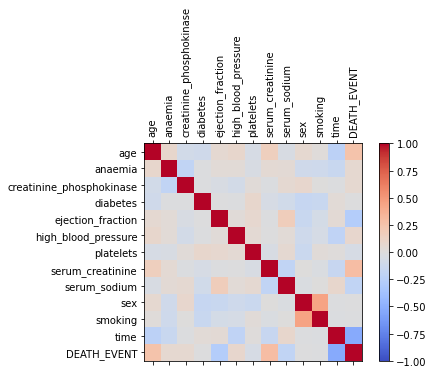

In [20]:
# Check relationship between variables in dataset with correlation
corr = heart_df.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(heart_df.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(heart_df.columns)
ax.set_yticklabels(heart_df.columns)
plt.show()

In [21]:
# Correlation between 'age' and other variables
heart_df.corr().iloc[:, :1]

,age
age,1.000000
anaemia,0.088006
creatinine_phosphokinase,-0.081584
diabetes,-0.101012
ejection_fraction,0.060098
high_blood_pressure,0.093289
platelets,-0.052354
serum_creatinine,0.159187
serum_sodium,-0.045966
sex,0.065430


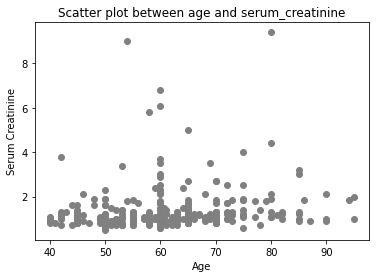

In [22]:
# Plot 'age' and 'serum_creatinine'
plt.scatter(heart_df["age"],heart_df['serum_creatinine'],color="grey")
plt.title("Scatter plot between age and serum_creatinine")
plt.xlabel('Age')
plt.ylabel('Serum Creatinine')
plt.show()


In [23]:
# corr(age,serum_creatinine) = 0.159
# Test if the correlation between 'age' and 'serum_creatinine' is statistically significant using Pearson correlation coefficient 
from scipy.stats.stats import pearsonr

pearsonr(heart_df['age'], heart_df['serum_creatinine'])

(0.15918713328355014, 0.0058034329412028325)

In [24]:
# corr(age,diabetes) = 0.101
# Test if the correlation between 'age' and 'diabetes' is statistically significant using Pearson correlation coefficient 
from scipy.stats.stats import pearsonr

pearsonr(heart_df['age'], heart_df['diabetes'])

(-0.10101238518196962, 0.08119152372169458)

In [25]:
# Add a new interaction variable to dataset 'age_serumcrea'
heart_df['age_serumcrea'] = heart_df['age']*heart_df['serum_creatinine']
heart_df1 = heart_df.pop('DEATH_EVENT')
heart_df['DEATH_EVENT'] = heart_df1

In [26]:
# Print new dataset includes 13 features
heart_df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,age_serumcrea,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,142.5,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,60.5,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,84.5,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,95.0,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,175.5,1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7684b4ee90>,
      dtype=object)

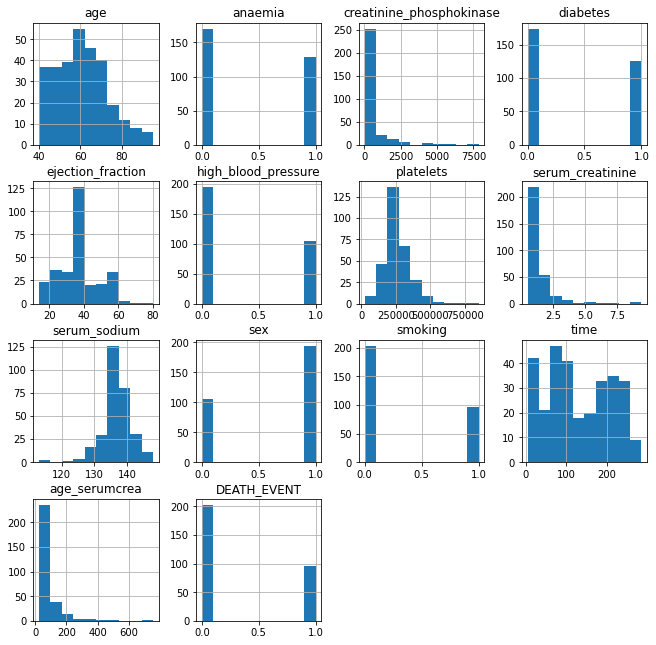

In [27]:
# Plot for exploring variable shapes
heart_df[heart_df.dtypes[(heart_df.dtypes=="float64")|(heart_df.dtypes=="int64")].index.values].hist(figsize=[11,11])

In [28]:
# Split dataset into train and test set (70/30)
death_targets = heart_df.iloc[:,13:]
features_13 = heart_df.iloc[:,:13]
x_train,x_test,y_train,y_test=train_test_split(features_13,death_targets,train_size=0.70,random_state=42)

In [29]:
# Data standardisation to all have the same scale into the range between 0 and 1
std = StandardScaler()     
x_train = std.fit_transform(x_train)
x_test = std.fit_transform(x_test)

In [30]:
# Random Forest with all 13 features
model2 = RandomForestClassifier()
model2.fit(x_train,y_train)
y_pred = model2.predict(x_test)

# Evaluate model
scores={"MCC":make_scorer(matthews_corrcoef),"f1_score":make_scorer(f1_score),"Accuracy":make_scorer(accuracy_score),
        "precision":make_scorer(precision_score),"recall":make_scorer(recall_score),
        "average_precision":make_scorer(average_precision_score),"Roc":make_scorer(roc_auc_score)}


kfold = cross_validate(model2,x_train,y_train,scoring=scores,cv=10)
l = list(kfold.values())
list1 = [np.mean(l[2]),np.mean(l[3]),np.mean(l[4]),np.mean(l[5]),np.mean(l[6]),np.mean(l[7]),np.mean(l[8])]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was

2. Random Forest Classifier with top 2 features (serum creatinine and ejection fraction) and 1 new interaction variable age_serumcreatinie

In [31]:
# Select needed features from dataset
class_labels = heart_df.iloc[:,13:]
top_features = heart_df[['serum_creatinine', 'ejection_fraction','age_serumcrea']]

# Spliting dataset 
xx_train,xx_test,yy_train,yy_test = train_test_split(top_features,class_labels,train_size=0.70,random_state=42)

In [32]:
# Rescaling attributes
std = StandardScaler()               
xx_train = std.fit_transform(xx_train)
xx_test = std.fit_transform(xx_test)

In [33]:
# Random Forest with 3 features
# Training
model3 = RandomForestClassifier()
model3.fit(xx_train,yy_train)
# Predicting
y_pred = model3.predict(xx_test)

# Evaluating
scores = {"MCC":make_scorer(matthews_corrcoef),"f1_score":make_scorer(f1_score),"Accuracy":make_scorer(accuracy_score),
        "precision":make_scorer(precision_score),"recall":make_scorer(recall_score),
        "average_precision":make_scorer(average_precision_score),"Roc":make_scorer(roc_auc_score)}

kfold = cross_validate(model3,xx_train,yy_train,scoring=scores,cv=10)
l = list(kfold.values())
list2 = [np.mean(l[2]),np.mean(l[3]),np.mean(l[4]),np.mean(l[5]),np.mean(l[6]),np.mean(l[7]),np.mean(l[8])]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Plea

In [34]:
# Summarising performance results (7 metrics)
data = list(zip(list1,list2))
df = pd.DataFrame(data,columns=["Random Forest - all features","Random Forest - 3 features"])
new_df = df.T
new_df.head()
# MCC F1 score Accuracy TP rate TN rate PR AUC ROC AUC
new_df.columns = ["MCC", "F1 score", "Accuracy", "TP rate", "TN rate", "PR AUC", "ROC AUC"]
new_df.head()

,MCC,F1 score,Accuracy,TP rate,TN rate,PR AUC,ROC AUC
Random Forest - all features,0.669442,0.748392,0.861429,0.822302,0.713333,0.672796,0.816667
Random Forest - 3 features,0.515636,0.616932,0.804762,0.716349,0.600000,0.554868,0.743333
